In [ ]:
#Imprime matriz de confusión
def print_confussion_matrix(y_test, y_pred):
    sns.heatmap((confusion_matrix(y_test,y_pred)), annot=True, fmt="d",cmap="crest")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

def print_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [ ]:
from ast_preprocessing import canonicalize 
#Se leen todos los documentos y con estos utiliza la función de similitud coseno entre los textos, para asi determinar si hay plagio o no.
#Finalmente, muestra todos los histogramas, curva ROC y matriz de confusión.

def decision(file_path_originals, file_path_suspicious, actual_results):

    system_results = []

    # Preproceso de textos originales
    original_texts = [file for file in os.listdir(file_path_originals) if os.path.isfile(os.path.join(file_path_originals, file))]
    processed_original_texts = []
    for original_text in original_texts:
        text = preprocessing(file_path_originals + "/" + original_text)
        canonical_text = canonicalize(text)
        #print("Texto original: ", text)
        processed_original_texts.append(canonical_text)


    # Preproceso de textos sospechosos
    suspicious_texts = [file for file in os.listdir(file_path_suspicious) if os.path.isfile(os.path.join(file_path_suspicious, file))]
    processed_suspicious_texts = []
    for suspicious_text in suspicious_texts:
        text = preprocessing(file_path_suspicious + "/" + suspicious_text)
        processed_suspicious_texts.append(text)

    original_embeddings = []
    for i, processed_original_text in enumerate(processed_original_texts):
        original_embeddings.append([])
        for l in range(len(processed_original_text)):
            original_embeddings[i].append(embed([processed_original_text[l]]))

    # Se hace la comparación entre los 2 textos
    for k, processed_suspicious_text in enumerate(processed_suspicious_texts):
        print("Texto sospechoso: ", suspicious_texts[k])
        plagiarized_check = False
        suspicious_plagiarsim_words = 0
        suspicious_embeddings = []
        for i in range(len(processed_suspicious_text)):
            suspicious_embeddings.append(embed([processed_suspicious_text[i]]))

        for i, processed_original_text in enumerate(processed_original_texts):
            word_count_plagiarism = preparation(suspicious_embeddings, original_embeddings[i], processed_suspicious_text)
            plagiarism_original_word_count = word_count_plagiarism/len(".".join(processed_suspicious_text).split())
            # Checa si hay plagio
     
            # ! Modificar           
            if word_count_plagiarism > 0 and (plagiarism_original_word_count*100 >25):
                print("\tPlagio detectado en: ", original_texts[i])
                print(f'\tPorcentaje de plagio: {plagiarism_original_word_count*100:.1f}%')
                print("\t\n")
                suspicious_plagiarsim_words += word_count_plagiarism
                
                if not plagiarized_check:
                    system_results.append(1)
                    plagiarized_check = True


        if not plagiarized_check:
            print("\tNo se encontro plagio\n")
            system_results.append(0)

        if suspicious_plagiarsim_words/len(".".join(processed_original_text).split()) > 0.15:
            percentaje_plagiarism = suspicious_plagiarsim_words/len(".".join(processed_suspicious_text).split())*100
            if percentaje_plagiarism > 100:
                percentaje_plagiarism = 100
            print(f'\tHay un total de plagio en {suspicious_texts[k]} de: {percentaje_plagiarism:.1f}%')
            print("\t\n")

    # Impresión de tablas
    tn, fp, fn, tp = confusion_matrix(actual_results, system_results).ravel()
    print(f'Predicted Results: {system_results}')
    print(f'Actual Results: {actual_results}')
    fpr, tpr, thresholds = metrics.roc_curve(actual_results, system_results, pos_label=1)
    print(f'True Positive: {tp}')
    print(f'False Positive: {fp}')
    print(f'True Negative: {tn}')
    print(f'False Negative: {fn}')
    print("False Positive Rate: ", fp/(fp+tn))
    print("True Positive Rate: ", tp/(tp+fn))
    print("AUC:", metrics.auc(fpr, tpr))

    print_confussion_matrix(actual_results, system_results)
    print_roc(fpr, tpr, metrics.auc(fpr, tpr))


In [ ]:
from preprocess import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os
import seaborn as sns
from preparation import preparation
from model import embed

Texto sospechoso:  T01N1.java
	No se encontro plagio

Texto sospechoso:  T01N2.java
	Plagio detectado en:  T3.java
	Porcentaje de plagio: 38.1%
	

Texto sospechoso:  T01N3.java
	Plagio detectado en:  T1.java
	Porcentaje de plagio: 25.0%
	

	Plagio detectado en:  T3.java
	Porcentaje de plagio: 40.0%
	

	Hay un total de plagio en T01N3.java de: 65.0%
	

Texto sospechoso:  T01P1.java
	Plagio detectado en:  T1.java
	Porcentaje de plagio: 49.0%
	

	Plagio detectado en:  T2.java
	Porcentaje de plagio: 29.4%
	

	Plagio detectado en:  T3.java
	Porcentaje de plagio: 78.4%
	

	Plagio detectado en:  T4.java
	Porcentaje de plagio: 29.4%
	

	Plagio detectado en:  T5.java
	Porcentaje de plagio: 29.4%
	

	Hay un total de plagio en T01P1.java de: 100.0%
	

Texto sospechoso:  T01P2.java
	No se encontro plagio

Texto sospechoso:  T02N1.java
	Plagio detectado en:  T1.java
	Porcentaje de plagio: 26.0%
	

	Plagio detectado en:  T2.java
	Porcentaje de plagio: 66.4%
	

	Plagio detectado en:  T3.java
	Porcent

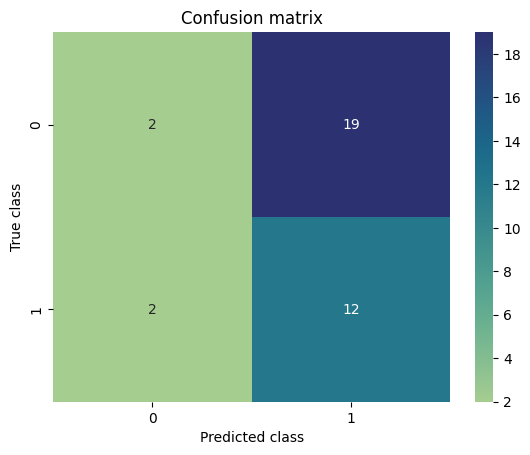

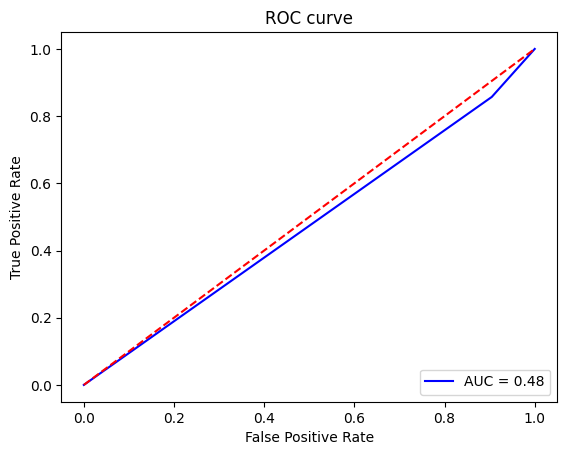

In [48]:
decision("original_files", "suspicious_files", [0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1])